In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
df = pd.read_csv('ClimateData.csv')

In [20]:
display(df)

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [16]:
#Question 1 data types summary
print(df.dtypes)

id                        int64
building_class           object
floor_area              float64
year_built              float64
precipitation_inches    float64
snowfall_inches         float64
avg_temp                float64
days_with_fog           float64
site_eui                float64
dtype: object


In [33]:
#Question 2 Unique ID for categorical variable 
unique_values_count = df['building_class'].nunique()
print(f"Number of unique values in 'building_class' :{unique_values_count}")

Number of unique values in 'building_class' :2


In [35]:
#Question 3 Descrpitve Statistics 
descriptive_statistics = df.describe()
print(descriptive_statistics)
#Understanding central tendency helps identify typical values,
#while dispersion measures reveal the variability or spread of the data.

                 id    floor_area    year_built  precipitation_inches  \
count  75757.000000  7.575700e+04  73920.000000          75757.000000   
mean   37878.000000  1.659839e+05   1952.306764             42.430651   
std    21869.306509  2.468758e+05     37.053619             10.592205   
min        0.000000  9.430000e+02      0.000000              0.000000   
25%    18939.000000  6.237900e+04   1927.000000             39.350000   
50%    37878.000000  9.136700e+04   1951.000000             42.170000   
75%    56817.000000  1.660000e+05   1977.000000             46.320000   
max    75756.000000  6.385382e+06   2015.000000            107.690000   

       snowfall_inches      avg_temp  days_with_fog      site_eui  
count     75757.000000  75757.000000   29961.000000  75757.000000  
mean         29.136379     56.176705     109.142051     82.584707  
std          17.810894      2.241940      50.699751     58.255413  
min           0.000000     44.512329      12.000000      1.000000  
25

In [37]:
# Question 4 Missing Values 
missing_values_count = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values_count}")

#These missing values could possibly effect the relaibility and variability
#of the spread of data

Missing values in each column:
id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64


In [23]:
#Question 5 Missing data Handling // i decided to impute missing values 
#with the mean and remove rows with missing categorical data 
impute_data = df.fillna(df.mean())
clean_data = impute_data.dropna()
print(clean_data.head())

#i did both imputation and removal to make the data more valid 

   id building_class  floor_area  year_built  precipitation_inches  \
0   0     Commercial     61242.0      1942.0                 16.59   
1   1     Commercial    274000.0      1955.0                 16.59   
2   2     Commercial    280025.0      1951.0                 16.59   
3   3     Commercial     55325.0      1980.0                 16.59   
4   4     Commercial     66000.0      1985.0                 16.59   

   snowfall_inches   avg_temp  days_with_fog  site_eui  
0              0.0  56.972603     109.142051    248.68  
1              0.0  56.972603      12.000000     26.50  
2              0.0  56.972603      12.000000     24.69  
3              0.0  56.972603      12.000000     48.41  
4              0.0  56.972603     109.142051      3.90  


/tmp/ipykernel_766/1934065912.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  impute_data = df.fillna(df.mean())


In [24]:
#6 duplicate records
duplicate_count = clean_data.duplicated().sum()
print("\nNumber of Duplicate records:")
print(duplicate_count)

#no duplicate records no methods are needed


Number of Duplicate records:
0


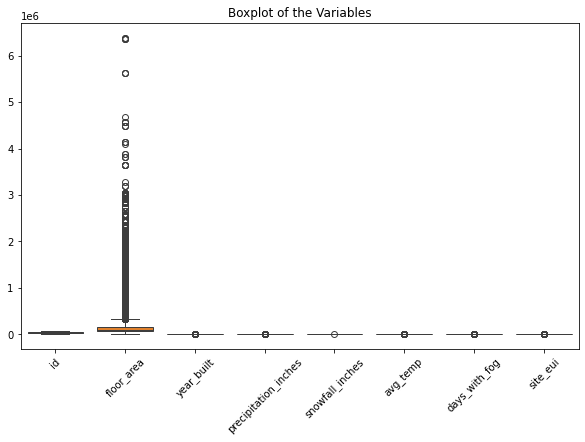

In [104]:
#7 outlier detection with box plots
plt.figure(figsize=(10,6))
sns.boxplot(data=clean_data)
plt.title("Boxplot of the Variables")
plt.xticks(rotation=45)
plt.show()

#outiers can impact data analysis and since there is a great number
#of outliers instead of removing them we can fix it with scaling 

In [35]:
#8 outlier detection with z score
z_scores = np.abs((clean_data[numeric_cols] - clean_data[numeric_cols].mean()))
outliers = z_scores > 3
outlier_count = outliers.sum()
print("\nNumber of Outliers Detected with Z-score:")
print(outlier_count)


Number of Outliers Detected with Z-score:
id                      75750
floor_area              75757
year_built              69836
precipitation_inches    43082
snowfall_inches         62192
avg_temp                 8554
days_with_fog           27740
site_eui                70048
dtype: int64


<Figure size 864x576 with 0 Axes>

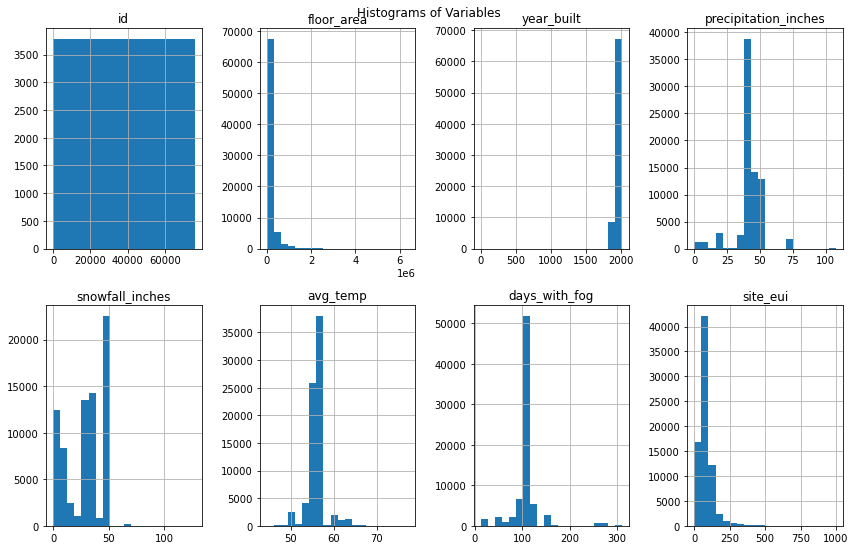

In [63]:
#9 Histogram analysis distribution
plt.figure(figsize=(12, 8))
clean_data[numeric_cols].hist(bins=20, layout=(2, 4), figsize=(12, 8))  # Adjust the layout as needed
plt.suptitle("Histograms of Variables", y=0.95)
plt.tight_layout()  
plt.show()

#i dont really see any noticeble patterns in the histograms but the shapes 
#can help decide what statistical methods to use for analysis 


In [99]:
#10 feauture scaling // i decided to normalizde the data min-max scaling
scaler_minmax = MinMaxScaler()
normalized_df = pd.DataFrame(normalized_data, columns=clean_data[numeric_cols].columns)
display(normalized_df)
# i do think scaling is nescessary to normalize the datatset
# to improve the performance 
# of certain algorithms 

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0.000000,0.009445,0.963772,0.154053,0.000000,0.380665,0.32489,0.248458
1,0.000013,0.042769,0.970223,0.154053,0.000000,0.380665,0.00000,0.025580
2,0.000026,0.043713,0.968238,0.154053,0.000000,0.380665,0.00000,0.023764
3,0.000040,0.008518,0.982630,0.154053,0.000000,0.380665,0.00000,0.047559
4,0.000053,0.010190,0.985112,0.154053,0.000000,0.380665,0.32489,0.002909
...,...,...,...,...,...,...,...,...
75752,0.999947,0.003049,0.990074,0.418145,0.010998,0.324909,0.32489,0.132334
75753,0.999960,0.006194,0.947891,0.418145,0.010998,0.324909,0.32489,0.038601
75754,0.999974,0.004249,0.951365,0.987278,0.287510,0.103837,0.32489,0.047549
75755,0.999987,0.008244,0.998511,0.987278,0.287510,0.103837,0.32489,0.592876


In [72]:
#11 Range Analysis: Min and Max
variable_ranges = clean_data.describe().loc[['min','max']]
print("\nRange Analysis:")
print(variable_ranges)
#Understanding the range of values in our data helps us identify what's
#typical and what's unusual, guiding us in detecting anomalies or errors.
#Additionally, it informs preprocessing decisions such as data normalization


Range Analysis:
          id  floor_area  year_built  precipitation_inches  snowfall_inches  \
min      0.0       943.0         0.0                  0.00              0.0   
max  75756.0   6385382.0      2015.0                107.69            127.3   

      avg_temp  days_with_fog  site_eui  
min  44.512329           12.0      1.00  
max  77.245205          311.0    997.87  


In [71]:
#12 encoding categorical variables (one hot encoding)
encoded_data = pd.get_dummies(clean_data, drop_first=True)
print("\nEncoded Data:")
print(encoded_data.head())

#i chose one hot encoding for my method. its most suitable for nominal 
#categorical variabes 


Encoded Data:
   id  floor_area  year_built  precipitation_inches  snowfall_inches  \
0   0     61242.0      1942.0                 16.59              0.0   
1   1    274000.0      1955.0                 16.59              0.0   
2   2    280025.0      1951.0                 16.59              0.0   
3   3     55325.0      1980.0                 16.59              0.0   
4   4     66000.0      1985.0                 16.59              0.0   

    avg_temp  days_with_fog  site_eui  building_class_Residential  
0  56.972603     109.142051    248.68                           0  
1  56.972603      12.000000     26.50                           0  
2  56.972603      12.000000     24.69                           0  
3  56.972603      12.000000     48.41                           0  
4  56.972603     109.142051      3.90                           0  
